In [3]:
import base64
import chardet
import pprint
import requests
from IPython.display import Image

VIRASANA_URL = "http://localhost/virasana/"
# VIRASANA_URL = "http://10.68.64.12/virasana/"

# Realizando consulta no BD com get

In [33]:
r = requests.get(VIRASANA_URL + 'grid_data',
                 params={'metadata.carga.conhecimento.conhecimento': 'non_ecsistente'})
print(r.url)
print(r.status_code)
print(r.text)

http://localhost/virasana/grid_data?metadata.carga.conhecimento.conhecimento=non_ecsistente
404
[]



In [38]:
r = requests.get(VIRASANA_URL + "grid_data",
                 params={'metadata.carga.conhecimento.conhecimento': '151705125931807'})
print(r.url)
print(r.status_code)
print(r.text)

http://localhost/virasana/grid_data?metadata.carga.conhecimento.conhecimento=151705125931807
200
[
  {
    "_id": "5c53092d1004b3779c37d97e", 
    "contentType": "image/jpeg"
  }, 
  {
    "_id": "5c5309271004b3779c37d1fe", 
    "contentType": "image/jpeg"
  }
]



## Pegando informações adicionais

In [39]:
lista_ids = list(r.json())

In [40]:
lista_ids

[{'_id': '5c53092d1004b3779c37d97e', 'contentType': 'image/jpeg'},
 {'_id': '5c5309271004b3779c37d1fe', 'contentType': 'image/jpeg'}]

In [41]:
for row in lista_ids:
    r = requests.get(VIRASANA_URL + "summary/%s" % row['_id'])
    print(r.url)
    print(r.text)

http://localhost/virasana/summary/5c53092d1004b3779c37d97e
Número contêiner informado pelo recinto
TCLU4005400
Data de escaneamento
2017-07-01 15:23
Data de Carregamento da imagem no sistema
2019-01-31 14:41
Nome Recinto
BTP2
Operação
lci - Importação
CONTÊINER COM CARGA

PESO TOTAL
29300.00
Conhecimento - Manifesto - Escala
CE 151705125931807 - 1517501412710 - 17000233867
Descrição
79 pk 26 pk package . 27 pk package . 26 pk package holmen view -53 gsm fsc mix credit: ra-coc-001 386 ncm: 4802.61.99 wooden packaging: not applicable (not used) freight prepaid 20 freedays demurrage (equipment) papel e cartao, nao revestidos, dos
Consignatário
03858331000155 - plural industria grafica ltda 
Número contêiner - tara - peso - volume
tclu4005400 - 3700kg - 25600kg - 48m³
NCM
4802 4802 4802
Data e hora de atracação do Manifesto
01/07/2017 03:08:00
http://localhost/virasana/summary/5c5309271004b3779c37d1fe
Número contêiner informado pelo recinto
TRLU9504252
Data de escaneamento
2017-07-01 16:05

## Pegando arquivos e imagens

In [43]:
imgs = []
for row in lista_ids:
    r = requests.get(VIRASANA_URL + "image/%s" % row['_id'])
    print(r.url)
    imgs.append(r)

http://localhost/virasana/image/5c53092d1004b3779c37d97e
http://localhost/virasana/image/5c5309271004b3779c37d1fe


In [44]:
encode = chardet.detect(imgs[1].content)
print(encode)
pprint.pprint(bytes(imgs[1].content).decode(encode['encoding']))

{'confidence': 0.0, 'encoding': None, 'language': None}


TypeError: decode() argument 1 must be str, not None

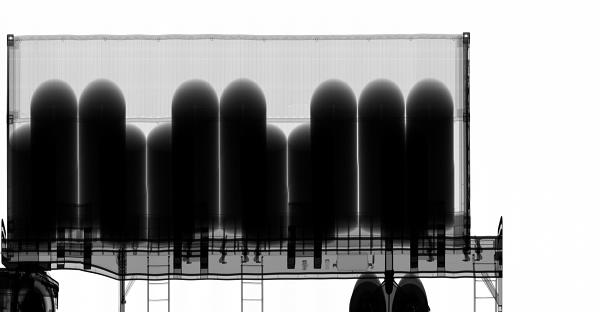

In [48]:
Image(imgs[0].content)

http://localhost/virasana/mini1/5c5309271004b3779c37d1fe


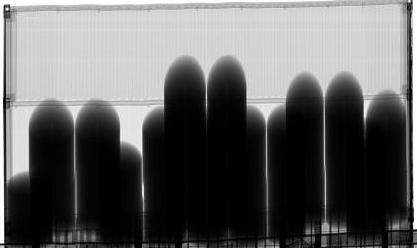

In [49]:
r = requests.get(VIRASANA_URL + "mini1/%s" % lista_ids[1]['_id'])
print(r.url)
Image(r.content)

In [19]:
r = requests.get(VIRASANA_URL + "mini2/%s" % lista_ids[1]['_id'])
print(r.url)
Image(r.content)

http://localhost/virasana/mini2/5c5309271004b3779c37d1fe


## Pegando todos os dados do registro (documento MongoDB)

In [20]:
r = requests.get(VIRASANA_URL + "json/%s" % lista_ids[1]['_id'])
print(r.url)
pprint.pprint(r.json())

http://localhost/virasana/json/5c5309271004b3779c37d1fe
{'UNIDADE': 'ALFSTS:',
 'alertapeso': True,
 'carga': {'atracacao': {'_id': {'$oid': '5c5342e31004b333d727dd5a'},
                         'codigoterminal': 'brssz058',
                         'dataatracacao': '01/07/2017',
                         'dataatracacaoiso': {'$date': 1498878480000},
                         'datadesatracacao': '02/07/2017',
                         'escala': '17000233867',
                         'horaatracacao': '03:08:00',
                         'horadesatracacao': '20:21:00',
                         'localatracacao': 'btp02',
                         'nometerminal': 'brasil terminal portuario - btp',
                         'situacao': 'atracada'},
           'conhecimento': [{'_id': {'$oid': '5c5342d21004b333d7272c5a'},
                             'canaldespachodi': 'verde',
                             'codigoagentenavegacao': '02378779000109',
                             'codigodasituacaod

# Fazendo consulta com POST e escolhendo os campos desejados

In [31]:
params = {'query': 
          { 'metadata.carga.conhecimento.conhecimento': '151705125931807',
            'metadata.contentType': 'image/jpeg'
          },
          'projection': 
          {'metadata.numeroinformado': 1,
           'metadata.dataescaneamento': 1,
           'metadata.carga.container': 1,
           'metadata.carga.ncm': 1}
         }

r = requests.post(VIRASANA_URL + "grid_data", json=params)
print(r.url)
print(r.text)

http://localhost/virasana/grid_data
[
  {
    "_id": "5c53092d1004b3779c37d97e", 
    "metadata": {
      "carga": "{'container': [{'lacre1': 'a0979332', 'container': 'tclu4005400', 'taracontainer': '003700,000', 'quantidadebloqueiosativos': '00', 'pesobrutoitem': '000025600,000', 'capacidade': '40', 'quantidadebloqueiosinativos': '00', '_id': ObjectId('5c5342f41004b333d728879a'), 'conhecimento': '151705125931807', 'volumeitem': '0000000048,000', 'tipo': \"general purpose(40'/8'6) - dry 40'\", 'item': '0001'}], 'ncm': [{'_id': ObjectId('5c53434a1004b333d72de825'), 'conhecimento': '151705125931807', 'descricao': 'papel e cartao, nao revestidos, dos tipos utilizados para escrita, impressao ou outros fins graficos, e papel e cartao para fabricar cartoes', 'item': '0001', 'ncm': '4802'}, {'_id': ObjectId('5c53434a1004b333d72de826'), 'conhecimento': '151705125931807', 'descricao': 'papel e cartao, nao revestidos, dos tipos utilizados para escrita, impressao ou outros fins graficos, e papel 

http://localhost/virasana/image/5c5309271004b3779c37d1fe


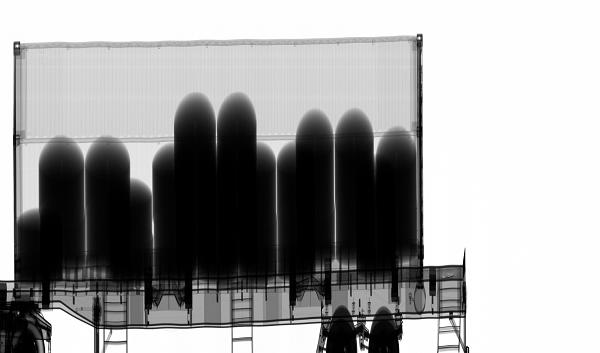

In [32]:
lista_ids = list(r.json())
r = requests.get(VIRASANA_URL + 'image/%s' % lista_ids[1]['_id'])
print(r.url)
Image(r.content)